In [1]:
import pandas as pd
df = pd.read_csv('data/COVID19.csv', encoding="euc-kr")
df.head()

,구분별,상태별,시점,인원[명],Unnamed: 4
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN


tensorflow 안에 keras 를 가지고 있고 keras 는 본래 개별 모듈인데
tensorflow 에는 keras 에 없어서 모듈이 있는 반면 keras 버전에 따라서 없어진 모듈이 많이 있다.

# 위 데이터에 구분에서 전체 데이터를 이용하여 인원을 예측하고 시각화 해보기

## 결측치 처리

In [2]:
data = df.drop(['Unnamed: 4'], axis=1)
data

,구분별,상태별,시점,인원[명]
0,전체,신규,2020. 04. 09,39.0
1,전체,신규,2020. 04. 10,27.0
2,전체,신규,2020. 04. 11,30.0
3,전체,신규,2020. 04. 12,32.0
4,전체,신규,2020. 04. 13,25.0
...,...,...,...,...
9149,검역,신규,2021. 02. 05,7.0
9150,검역,신규,2021. 02. 06,11.0
9151,검역,신규,2021. 02. 07,27.0
9152,검역,신규,2021. 02. 08,9.0


In [3]:
data_all = data[:307]

In [4]:
data_all

,구분별,상태별,시점,인원[명]
0,전체,신규,2020. 04. 09,39.0
1,전체,신규,2020. 04. 10,27.0
2,전체,신규,2020. 04. 11,30.0
3,전체,신규,2020. 04. 12,32.0
4,전체,신규,2020. 04. 13,25.0
...,...,...,...,...
302,전체,신규,2021. 02. 05,370.0
303,전체,신규,2021. 02. 06,393.0
304,전체,신규,2021. 02. 07,371.0
305,전체,신규,2021. 02. 08,288.0


In [5]:
df.iloc[307]

구분별                     남성
상태별                     신규
시점            2020. 04. 09
인원[명]                 22.0
Unnamed: 4             NaN
Name: 307, dtype: object

## 데이터 정규화

In [6]:
data_all['인원[명]'].shape

(307,)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 2차원 으로 해야함.
scaled_data = scaler.fit_transform(data_all[['인원[명]']])
scaled_data[:3]

array([[0.02986279],
       [0.02017756],
       [0.02259887]])

## 시계열 데이터 생성 함수

In [8]:
import numpy as np 
def create_sequences(data, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i : (i + time_steps), 0])
        ys.append(data[i + time_steps, 0])
    return np.array(Xs), np.array(ys)

## 시계열 데이터 생성

In [9]:
TIME_STEPS = 10
X, y = create_sequences(scaled_data , TIME_STEPS)

## 데이터 분할

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## LSTM 모델 구성

In [11]:
X_train.shape

(237, 10)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Input

input_shape = (X_train.shape[1], 1)
model = Sequential([
    Input(shape=input_shape),
    LSTM(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

## 모델 훈련

In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010    
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7691e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8917e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0881e-04 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010     
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010    
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010     
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012    
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3768e-04 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010     
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8265e-04 
Epoch 15/100
15/15

## 모델 평가

In [18]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 


0.00967969186604023

In [19]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


## 결과 시각화

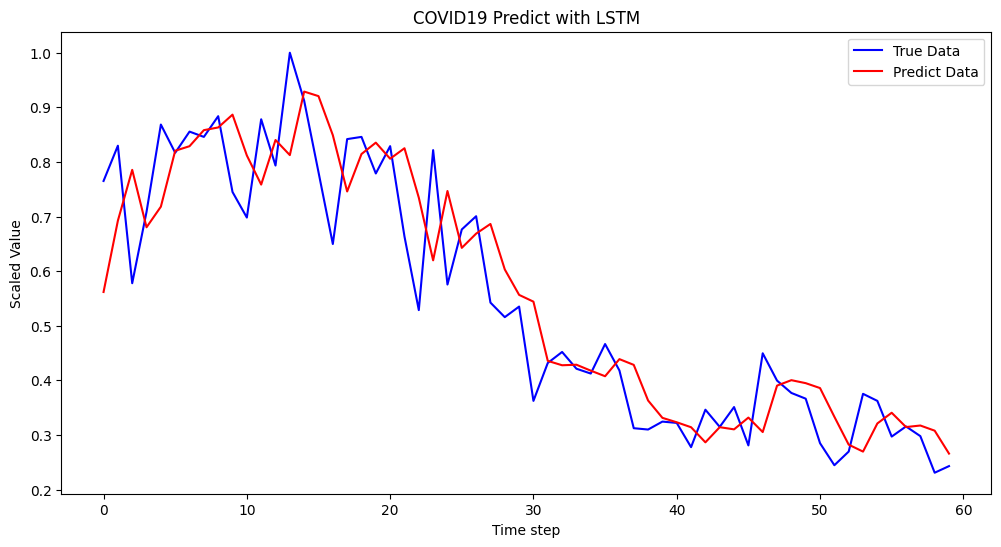

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Data', color='blue')
plt.plot(y_pred, label='Predict Data', color='red')
plt.title('COVID19 Predict with LSTM')
plt.xlabel('Time step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

## 원 데이터로 시각화

In [22]:
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1,1))

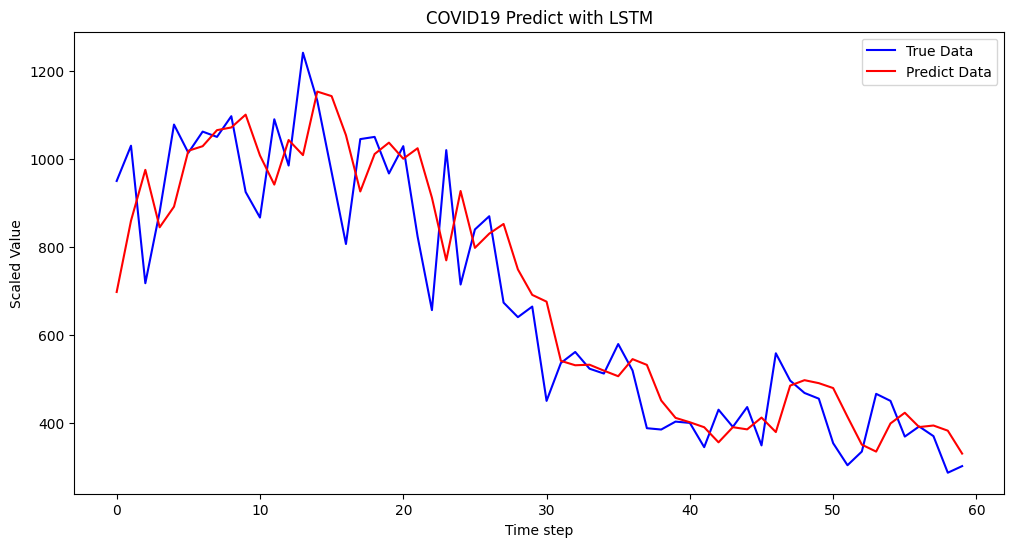

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='True Data', color='blue')
plt.plot(y_pred_unscaled, label='Predict Data', color='red')
plt.title('COVID19 Predict with LSTM')
plt.xlabel('Time step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()